In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
from os import listdir
from os.path import isfile, join
import math
mypath = 'e:\Observations\MMPP\\20201013\\20201013_catalogs\Standard\\'
files = pd.array([f for f in listdir(mypath) if isfile(join(mypath, f))])

In [8]:
for i in list(range(0,5,2)):
    cat1 = pd.read_csv(mypath+files[i], skiprows = 11, sep='\s+', header=None)
    cat2 = pd.read_csv(mypath+files[i+1], skiprows = 11, sep='\s+', header=None)
#cat1 = cat1.sort_values(by = [4,1,2], axis = 0)
#cat2 = cat2.sort_values(by = [4,1,2], axis = 0)
    stars1 = pd.DataFrame(data=None,columns = ['X','Y','Flux_o','Err_F_o','Flux_e','Err_F_e'],dtype=float)
    stars2 = pd.DataFrame(data=None,columns = ['X','Y','Flux_o','Err_F_o','Flux_e','Err_F_e'],dtype=float)
    for j in cat1.index: 
         for k in cat1.index:
            if (cat1.iloc[j][1]-cat1.iloc[k][1]) <= 19.5 and (cat1.iloc[j][1]-cat1.iloc[k][1]) >= 16.5 and (cat1.iloc[j][2]-cat1.iloc[k][2]) <= 20.5 and (cat1.iloc[j][2]-cat1.iloc[k][2]) >= 17.5:
                stars1 = stars1.append({'X': cat1.iloc[j][1], 'Y': cat1.iloc[j][2], 'Flux_o': cat1.iloc[j][4], 'Err_F_o': cat1.iloc[j][7],'Flux_e': cat1.iloc[k][4],'Err_F_e':cat1.iloc[k][7]}, ignore_index=True)
    for j in cat2.index: 
        for k in cat2.index:
            if (cat2.iloc[j][1]-cat2.iloc[k][1]) <= 19 and (cat2.iloc[j][1]-cat2.iloc[k][1]) >= 17 and (cat2.iloc[j][2]-cat2.iloc[k][2]) <= 20 and (cat2.iloc[j][2]-cat2.iloc[k][2]) >= 18:
                stars2 = stars2.append({'X': cat2.iloc[j][1], 'Y': cat2.iloc[j][2], 'Flux_o': cat2.iloc[j][4], 'Err_F_o': cat2.iloc[j][7],'Flux_e': cat2.iloc[k][4],'Err_F_e':cat2.iloc[k][7]}, ignore_index=True)
    polar = pd.DataFrame(data = None, columns = ['X','Y', 'Dist','Int-45','Int+45','P,%'])
    for j in stars1.index:
        for k in stars2.index:
            if math.sqrt((stars1['X'][j]-stars2['X'][k])**2+(stars1['Y'][j]-stars2['Y'][k])**2) <= 5:
                d = math.sqrt((stars1['X'][j]-530)**2+(stars1['Y'][j]-550)**2)
                polar = polar.append({'X' :stars1['X'][j], 'Y': stars1['Y'][j], 'Dist': d, 'Int-45': stars1['Flux_o'][j]+stars1['Flux_e'][j], 'Int+45': stars2['Flux_o'][k]+stars2['Flux_e'][k], 'P,%': 50*((stars1['Flux_o'][j]-stars1['Flux_e'][j])/(stars1['Flux_o'][j]+stars1['Flux_e'][j])-(stars2['Flux_o'][k]-stars2['Flux_e'][k])/(stars2['Flux_o'][k]+stars2['Flux_e'][k]))}, ignore_index=True) 
    if i < 9:
        polar.sort_values(by='Dist').to_csv(mypath+'Res\\0'+str(i+1)+'.csv') 
    else:
        polar.sort_values(by='Dist').to_csv(mypath+'Res\\'+str(i+1)+'.csv')
        

In [7]:
for i in list(range(0,5,2)):
    cat1 = pd.read_csv(mypath+files[i], skiprows = 11, sep='\s+', header=None)
    cat2 = pd.read_csv(mypath+files[i+1], skiprows = 11, sep='\s+', header=None)
#cat1 = cat1.sort_values(by = [4,1,2], axis = 0)
#cat2 = cat2.sort_values(by = [4,1,2], axis = 0)
    stars1 = pd.DataFrame(data=None,columns = ['X','Y','Flux_o','Err_F_o','Flux_e','Err_F_e'],dtype=float)
    stars2 = pd.DataFrame(data=None,columns = ['X','Y','Flux_o','Err_F_o','Flux_e','Err_F_e'],dtype=float)
    for j in cat1.index: 
         for k in cat1.index:
            if (cat1.iloc[j][1]-cat1.iloc[k][1]) <= 19.5 and (cat1.iloc[j][1]-cat1.iloc[k][1]) >= 16.5 and (cat1.iloc[j][2]-cat1.iloc[k][2]) <= 20.5 and (cat1.iloc[j][2]-cat1.iloc[k][2]) >= 17.5:
                stars1 = stars1.append({'X': cat1.iloc[j][1], 'Y': cat1.iloc[j][2], 'Flux_o': cat1.iloc[j][3], 'Err_F_o': cat1.iloc[j][7],'Flux_e': cat1.iloc[k][3],'Err_F_e':cat1.iloc[k][7]}, ignore_index=True)
    for j in cat2.index: 
        for k in cat2.index:
            if (cat2.iloc[j][1]-cat2.iloc[k][1]) <= 19 and (cat2.iloc[j][1]-cat2.iloc[k][1]) >= 17 and (cat2.iloc[j][2]-cat2.iloc[k][2]) <= 20 and (cat2.iloc[j][2]-cat2.iloc[k][2]) >= 18:
                stars2 = stars2.append({'X': cat2.iloc[j][1], 'Y': cat2.iloc[j][2], 'Flux_o': cat2.iloc[j][3], 'Err_F_o': cat2.iloc[j][7],'Flux_e': cat2.iloc[k][3],'Err_F_e':cat2.iloc[k][7]}, ignore_index=True)
    polar = pd.DataFrame(data = None, columns = ['X','Y', 'Dist','Int-45','Int+45','P,%'])
    for j in stars1.index:
        for k in stars2.index:
            if math.sqrt((stars1['X'][j]-stars2['X'][k])**2+(stars1['Y'][j]-stars2['Y'][k])**2) <= 5:
                d = math.sqrt((stars1['X'][j]-530)**2+(stars1['Y'][j]-550)**2)
                polar = polar.append({'X' :stars1['X'][j], 'Y': stars1['Y'][j], 'Dist': d, 'Int-45': stars1['Flux_o'][j]+stars1['Flux_e'][j], 'Int+45': stars2['Flux_o'][k]+stars2['Flux_e'][k], 'P,%': 50*((stars1['Flux_o'][j]-stars1['Flux_e'][j])/(stars1['Flux_o'][j]+stars1['Flux_e'][j])+(stars2['Flux_o'][k]-stars2['Flux_e'][k])/(stars2['Flux_o'][k]+stars2['Flux_e'][k]))}, ignore_index=True) 
    if i < 9:
        polar.sort_values(by='Dist').to_csv(mypath+'Res\\0'+str(i+1)+'.csv') 
    else:
        polar.sort_values(by='Dist').to_csv(mypath+'Res\\'+str(i+1)+'.csv')
        


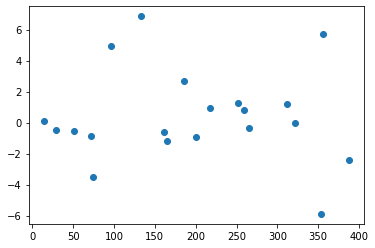

In [40]:
import matplotlib.pyplot as plot
plot.scatter(polar['Dist'],polar['P,%'])

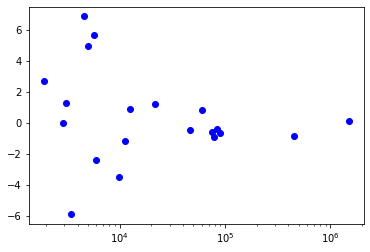

In [59]:
plot.semilogx(polar['Int-45'],polar['P,%'],'bo')
